# Name:- BHAWANA TIWARI
# Roll No. :- DS5B-2010

### Importing all the necessary Libraries

In [26]:
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from nltk.stem.porter import PorterStemmer
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingRegressor,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import re
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
import numpy as np
import plotly.offline as py
color=sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls


In [27]:
dataset = pd.read_csv('GrammarandProductReviews.csv')

In [28]:
dataset.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories             dateAdded  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...  2017-07-25T00:52:42Z   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   

            dateUpdated          ean  \
0  2018-02-05T08:36:58Z  6.02537E+11   
1  2018-02-05T11:27:45Z  73416000391   
2  2018-02-05T11:27:45Z  73416000391   
3  2018-02-05T11:25:51Z  67981934427   
4  2018-02-05T11:25:51Z  67981934427   

                                                keys  \
0  602537205981,universalmusic/14331328,universal...   
1  lundbergorganiccinnamontoastricecakes/b000fvzw...   
2  lundbergorganiccinnamontoastricecakes/b000fvzw...   
3  kylovesensualitypleasuregel/b00u2whx8s,0679819...   
4  kylovesensualitypleasuregel/b00u2whx8s,0679819...   

                         manufacturer manufacturerNumber  \
0  Universal Music Group / Cash Money           14331328   
1                            Lundberg             574764   
2                            Lundberg             574764   
3                                 K-Y        67981934427   
4                                 K-Y        67981934427   

                                         name  ...   reviews.id  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  ...          NaN   
1  Lundberg Organic Cinnamon Toast Rice Cakes  ...  100209113.0   
2  Lundberg Organic Cinnamon Toast Rice Cakes  ...  100209113.0   
3            K-Y Love Sensuality Pleasure Gel  ...  113026909.0   
4            K-Y Love Sensuality Pleasure Gel  ...  171267657.0   

  reviews.numHelpful reviews.rating  \
0                0.0              5   
1                NaN              5   
2                NaN              5   
3                NaN              1   
4                NaN              1   

                                  reviews.sourceURLs  \
0  https://redsky.target.com/groot-domain-api/v1/...   
1   https://www.walmart.com/reviews/product/29775278   
2   https://www.walmart.com/reviews/product/29775278   
3   https://www.walmart.com/reviews/product/43383370   
4   https://www.walmart.com/reviews/product/43383370   

                                        reviews.text  reviews.title  \
0  i love this album. it's very good. more to the...   Just Awesome   
1  Good flavor. This review was collected as part...           Good   
2                                       Good flavor.           Good   
3  I read through the reviews on here before look...   Disappointed   
4  My husband bought this gel for us. The gel cau...     Irritation   

   reviews.userCity  reviews.userProvince reviews.username          upc  
0       Los Angeles                   NaN           Joshua  6.02537E+11  
1               NaN                   NaN        Dorothy W  73416000391  
2               NaN                   NaN        Dorothy W  73416000391  
3               NaN                   NaN          Rebecca  67981934427  
4               NaN                   NaN        Walker557  67981934427  

[5 rows x 25 columns]

# Firstly Performing Exploratory Data Analysis 

In [29]:
dataset.isnull().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64

In [30]:
dataset.isnull().sum()/dataset.shape[0]*100

id                       0.000000
brand                    0.000000
categories               0.000000
dateAdded                0.000000
dateUpdated              0.000000
ean                     45.012950
keys                     0.000000
manufacturer             0.198469
manufacturerNumber       0.285738
name                     0.000000
reviews.date             0.094308
reviews.dateAdded        0.000000
reviews.dateSeen         0.000000
reviews.didPurchase     54.735094
reviews.doRecommend     14.941445
reviews.id              54.735094
reviews.numHelpful      54.242441
reviews.rating           0.000000
reviews.sourceURLs       0.000000
reviews.text             0.050673
reviews.title            0.670007
reviews.userCity        92.385001
reviews.userProvince    99.367997
reviews.username         0.135128
upc                      0.002815
dtype: float64

In [31]:
dataset['reviews.doRecommend'].unique()

array([nan, False, True], dtype=object)

In [35]:
#Finding the top brands
dataset['brand'].value_counts().iloc[:55]

Clorox                        10700
Universal Home Video           6178
Tide                           5384
FOX                            4498
Disney                         3692
Olay                           3420
Warner Home Video              3330
L'Oreal Paris                  2683
L'oreal Paris                  2288
Sony Pictures                  2161
Rubbermaid                     1939
Warner Bros.                   1920
Quilted Northern               1439
Lionsgate                      1351
Burt's Bees                     965
Summit Entertainment            821
Nexxus                          773
Maybelline                      742
Pantene                         655
Foodsaver                       587
Head & Shoulders                565
Kiss                            562
Aveeno                          442
Lundberg                        426
Lemi Shine                      423
Just For Men                    416
Clear Scalp & Hair Therapy      377
Hoover                      

In [36]:
# Arranging brands in ascending order
dataset['brand'].value_counts().sort_values(ascending=True).iloc[:55]

Cheez-It                          1
Honey Bunches of Oats             1
Black Radiance                    1
Citrus Magic                      1
Touch of Color                    1
Pearhead                          1
Herr's                            1
Noosa                             1
Fit System                        1
Organic Root Stimulator           1
Pillow Perfect                    1
Hubba Bubba                       1
Hortense B. Hewitt                1
Bodycology                        1
Yardley                           1
Udi's                             1
Peak                              1
Walkers                           1
Gone Fishing                      1
Sanrio                            1
Season Seafood                    1
Alera                             1
Bosch                             1
Heinz                             1
Lucy's                            1
Nordicware                        1
Fangio Lighting                   1
Body Fantasies              

# Visualizing the Dataset to get the meaningfull insights

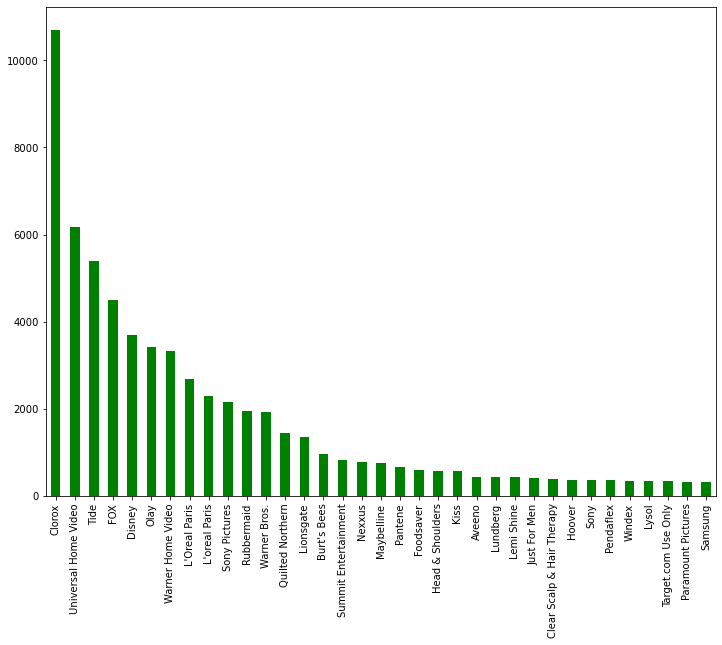

In [37]:
plt.figure(figsize=(12,9))
dataset['brand'].value_counts().iloc[:35].plot(kind = 'bar',color='green')
plt.show()


# The maximum number of ratings that people gave

In [41]:
cnt_srs = dataset['reviews.rating'].value_counts().head()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=cnt_srs.values[::-1],
        colorscale ='peach' ,
        reversescale = True
    ),
)

layout = dict(
    title='Ratings distribution',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Ratings")


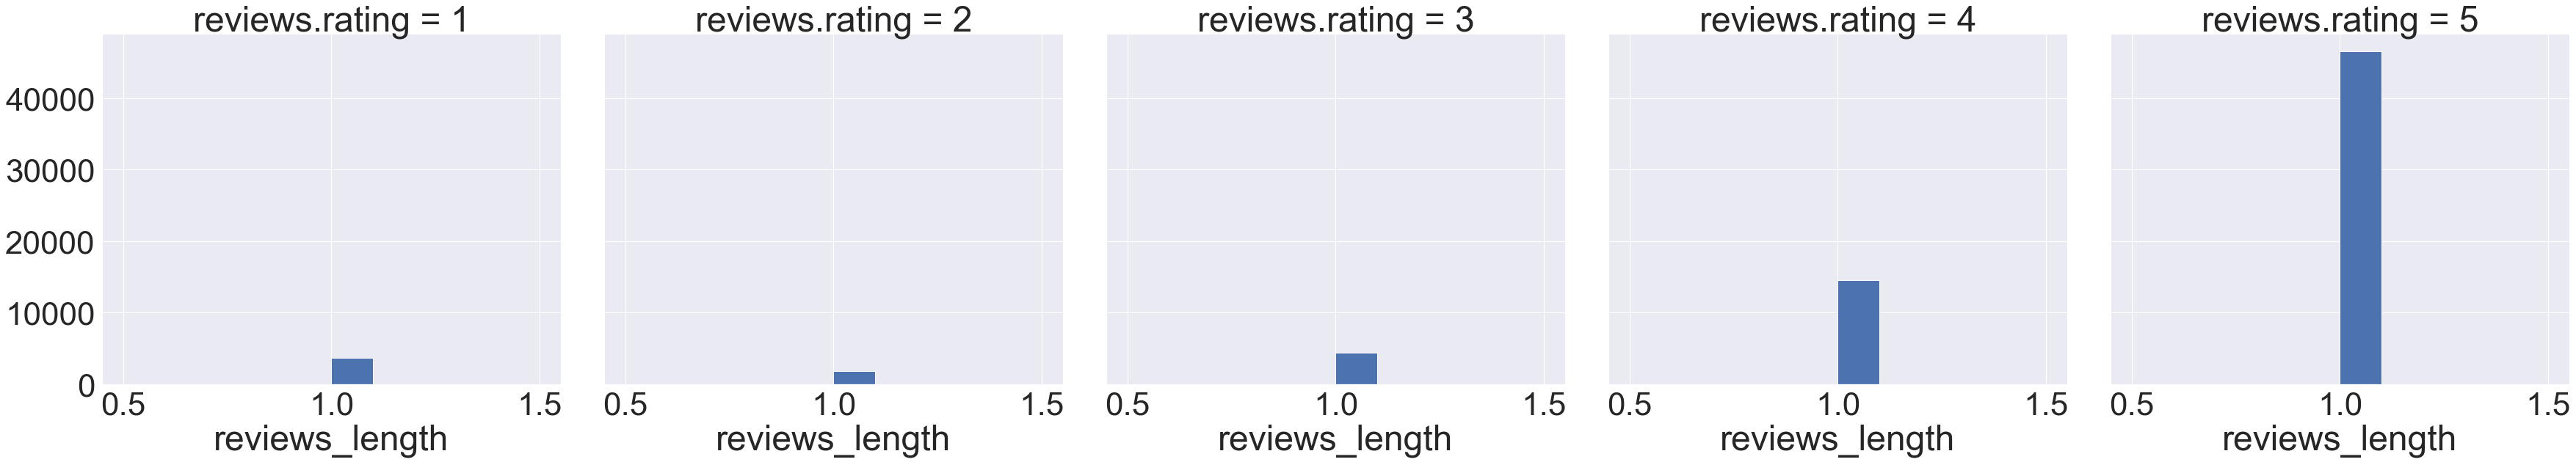

In [50]:
#dataset['reviews_length']=dataset['reviews.text'].apply(len)
sns.set(font_scale=4.0)
dataset['reviews_length']=len(['reviews.text'])
g = sns.FacetGrid(dataset,col='reviews.rating',size=10)
g.map(plt.hist,'reviews_length')

### Total Anonymous Customer

In [28]:
df['reviews.username'].value_counts().iloc[:55]

An anonymous customer    421
Anonymous                113
Mike                     105
Chris                     88
ByAmazon Customer         58
Dave                      57
John                      49
Rick                      41
James                     32
Robert                    31
Sandy                     30
Lisa                      29
Tony                      29
Steve                     28
Rich                      24
Donna                     24
Bill                      23
Nick                      23
Jess                      23
Frank                     23
Matt                      22
Josh                      22
Cindy                     22
Mimi                      22
Joey                      22
Jimmy                     22
Jeff                      21
Happy                     21
Mark                      21
Bobby                     20
Alex                      20
Angie                     20
Jenn                      20
movielover                20
Angel         

In [29]:
df.shape

(71044, 25)

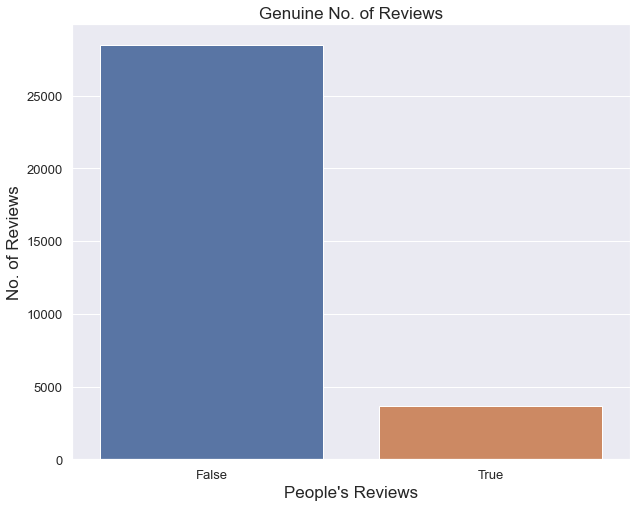

In [57]:
plt.figure(figsize=(10,8))
ax=sns.countplot(dataset['reviews.didPurchase'])
ax.set_xlabel(xlabel="People's Reviews",fontsize=17)
ax.set_ylabel(ylabel='No. of Reviews',fontsize=17)
ax.axes.set_title('Genuine No. of Reviews',fontsize=17)
ax.tick_params(labelsize=13)


In [60]:
dataset.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories             dateAdded  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...  2017-07-25T00:52:42Z   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   

            dateUpdated          ean  \
0  2018-02-05T08:36:58Z  6.02537E+11   
1  2018-02-05T11:27:45Z  73416000391   
2  2018-02-05T11:27:45Z  73416000391   
3  2018-02-05T11:25:51Z  67981934427   
4  2018-02-05T11:25:51Z  67981934427   

                                                keys  \
0  602537205981,universalmusic/14331328,universal...   
1  lundbergorganiccinnamontoastricecakes/b000fvzw...   
2  lundbergorganiccinnamontoastricecakes/b000fvzw...   
3  kylovesensualitypleasuregel/b00u2whx8s,0679819...   
4  kylovesensualitypleasuregel/b00u2whx8s,0679819...   

                         manufacturer manufacturerNumber  \
0  Universal Music Group / Cash Money           14331328   
1                            Lundberg             574764   
2                            Lundberg             574764   
3                                 K-Y        67981934427   
4                                 K-Y        67981934427   

                                         name  ... reviews.numHelpful  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  ...                0.0   
1  Lundberg Organic Cinnamon Toast Rice Cakes  ...                NaN   
2  Lundberg Organic Cinnamon Toast Rice Cakes  ...                NaN   
3            K-Y Love Sensuality Pleasure Gel  ...                NaN   
4            K-Y Love Sensuality Pleasure Gel  ...                NaN   

  reviews.rating                                 reviews.sourceURLs  \
0              5  https://redsky.target.com/groot-domain-api/v1/...   
1              5   https://www.walmart.com/reviews/product/29775278   
2              5   https://www.walmart.com/reviews/product/29775278   
3              1   https://www.walmart.com/reviews/product/43383370   
4              1   https://www.walmart.com/reviews/product/43383370   

                                        reviews.text reviews.title  \
0  i love this album. it's very good. more to the...  Just Awesome   
1  Good flavor. This review was collected as part...          Good   
2                                       Good flavor.          Good   
3  I read through the reviews on here before look...  Disappointed   
4  My husband bought this gel for us. The gel cau...    Irritation   

   reviews.userCity  reviews.userProvince  reviews.username          upc  \
0       Los Angeles                   NaN            Joshua  6.02537E+11   
1               NaN                   NaN         Dorothy W  73416000391   
2               NaN                   NaN         Dorothy W  73416000391   
3               NaN                   NaN           Rebecca  67981934427   
4               NaN                   NaN         Walker557  67981934427   

  reviews_length  
0              1  
1              1  
2              1  
3              1  
4              1  

[5 rows x 26 columns]

## Dropping Unnescessary Columns

In [61]:
dataset.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc',
       'reviews_length'],
      dtype='object')

In [59]:
columns = ['id','keys','manufacturerNumber','name','reviews.date','reviews.dateSeen','reviews.dateAdded','reviews.sourceURLs','reviews.userCity','reviews.userProvince', 'reviews.username','dateAdded', 'dateUpdated','reviews.id','reviews.sourceURLs','ean','reviews.didPurchase','reviews.doRecommend','upc','reviews.numHelpful']

In [62]:
dataset1 = dataset.drop(columns,axis=1)

In [63]:
dataset1

brand                                         categories  \
0      Universal Music  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1             Lundberg  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2             Lundberg  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3                  K-Y  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4                  K-Y  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
...                ...                                                ...   
71039        Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
71040        Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
71041        Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
71042     Bebe Au Lait  Baby,Nursing & Feeding,Breastfeeding,Nursing C...   
71043             UMGD  Movies, Music & Books,Music,Gospel & Christian...   

                             manufacturer  reviews.rating  \
0      Universal Music Group / Cash Money               5   
1                                Lundberg               5   
2                                Lundberg               5   
3                                     K-Y               1   
4                                     K-Y               1   
...                                   ...             ...   
71039                           Opti-Free               5   
71040                           Opti-Free               5   
71041                           Opti-Free               5   
71042                        Bebe au Lait               5   
71043                             Def Jam               5   

                                            reviews.text  \
0      i love this album. it's very good. more to the...   
1      Good flavor. This review was collected as part...   
2                                           Good flavor.   
3      I read through the reviews on here before look...   
4      My husband bought this gel for us. The gel cau...   
...                                                  ...   
71039  I'm dealing with dry eyes and very sensitive t...   
71040  Great stuff! Helps keep my contacts moist all ...   
71041                                        Right price   
71042  I was so pleased when this scarf arrived for m...   
71043  Excellent album, makes the holidays better, gi...   

                   reviews.title  reviews_length  
0                   Just Awesome               1  
1                           Good               1  
2                           Good               1  
3                   Disappointed               1  
4                     Irritation               1  
...                          ...             ...  
71039         Solves the problem               1  
71040               Great stuff!               1  
71041                  My review               1  
71042          Wonderful Product               1  
71043  Makes The Holidays Better               1  

[71044 rows x 7 columns]

<AxesSubplot:>

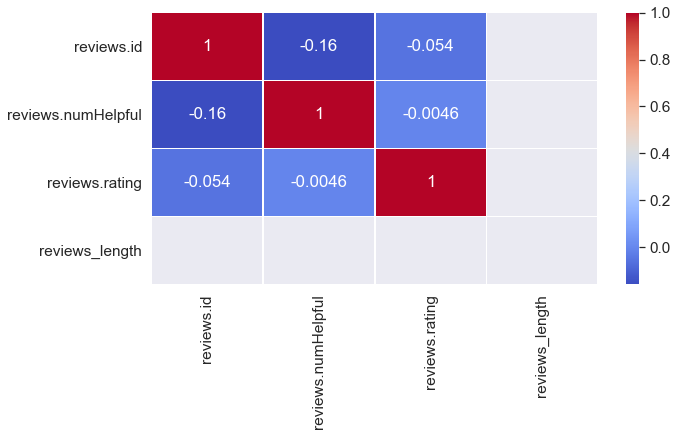

In [73]:
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
sns.heatmap(dataset.corr(),cmap='coolwarm',annot=True,linewidths=.5)

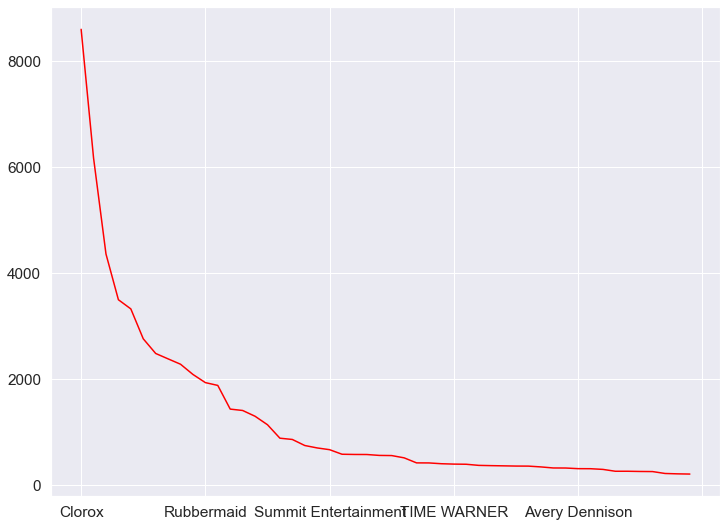

In [78]:
plt.figure(figsize=(12,9))
dataset1['manufacturer'].value_counts().iloc[:50].plot(kind = 'line',color='red')
plt.show()

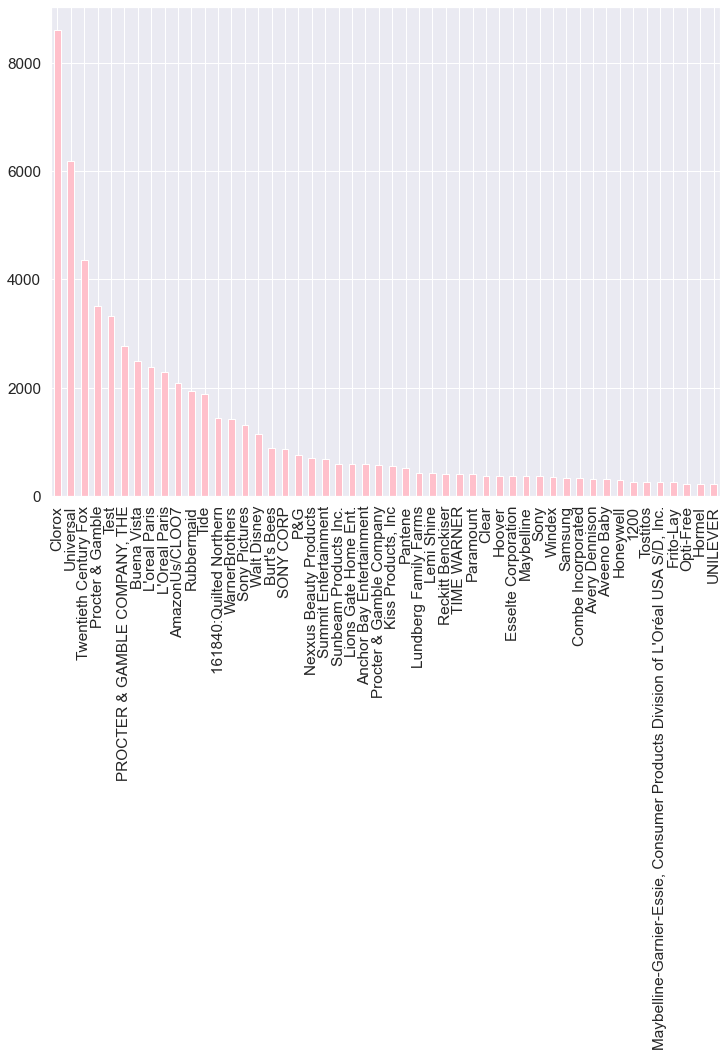

In [81]:
plt.figure(figsize=(12,9))
dataset1['manufacturer'].value_counts().iloc[:50].plot(kind = 'bar',color='pink')
plt.show()

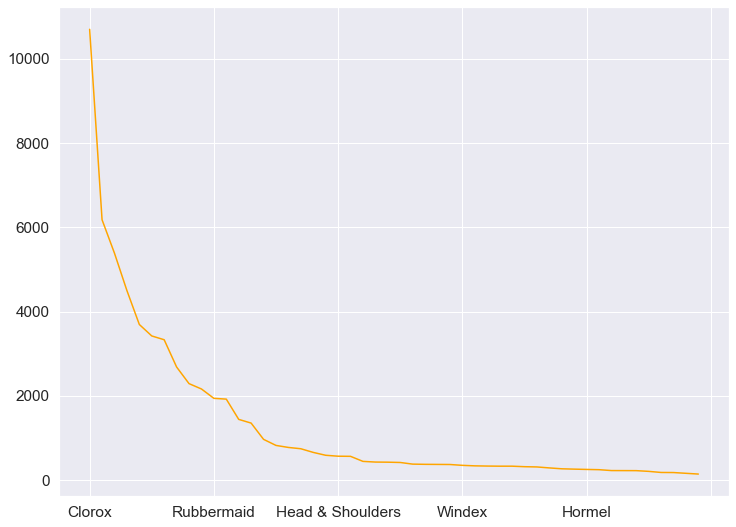

In [82]:
plt.figure(figsize=(12,9))
dataset1['brand'].value_counts().iloc[:50].plot(kind = 'line',color='orange',)
plt.show()

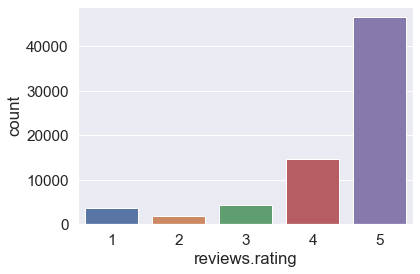

In [83]:
sns.countplot(dataset1['reviews.rating'])
plt.show()

In [84]:
dataset1[dataset1['reviews.rating']==5]

brand                                         categories  \
0      Universal Music  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1             Lundberg  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2             Lundberg  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
23                 K-Y  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
24                 K-Y  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
...                ...                                                ...   
71039        Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
71040        Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
71041        Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
71042     Bebe Au Lait  Baby,Nursing & Feeding,Breastfeeding,Nursing C...   
71043             UMGD  Movies, Music & Books,Music,Gospel & Christian...   

                             manufacturer  reviews.rating  \
0      Universal Music Group / Cash Money               5   
1                                Lundberg               5   
2                                Lundberg               5   
23                                    K-Y               5   
24                                    K-Y               5   
...                                   ...             ...   
71039                           Opti-Free               5   
71040                           Opti-Free               5   
71041                           Opti-Free               5   
71042                        Bebe au Lait               5   
71043                             Def Jam               5   

                                            reviews.text  \
0      i love this album. it's very good. more to the...   
1      Good flavor. This review was collected as part...   
2                                           Good flavor.   
23     Loved This review was collected as part of a p...   
24     This is a good product. Will give you a great ...   
...                                                  ...   
71039  I'm dealing with dry eyes and very sensitive t...   
71040  Great stuff! Helps keep my contacts moist all ...   
71041                                        Right price   
71042  I was so pleased when this scarf arrived for m...   
71043  Excellent album, makes the holidays better, gi...   

                   reviews.title  reviews_length  
0                   Just Awesome               1  
1                           Good               1  
2                           Good               1  
23                         Loved               1  
24               Great sensation               1  
...                          ...             ...  
71039         Solves the problem               1  
71040               Great stuff!               1  
71041                  My review               1  
71042          Wonderful Product               1  
71043  Makes The Holidays Better               1  

[46543 rows x 7 columns]

In [85]:
dataset1[dataset1['reviews.rating']==4]

brand                                         categories  \
20           K-Y  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
21           K-Y  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
22           K-Y  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
36          AMBI  Personal Care,Bath, Shower & Soap,Featured Bra...   
44     Johnson's  Personal Care,Baby Care,Baby Bubble Bath,Baby,...   
...          ...                                                ...   
70875  Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
70876  Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
70877  Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
70878  Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
70879  Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   

       manufacturer  reviews.rating  \
20              K-Y               4   
21              K-Y               4   
22              K-Y               4   
36     FLEMING & CO               4   
44        Johnson's               4   
...             ...             ...   
70875     Opti-Free               4   
70876     Opti-Free               4   
70877     Opti-Free               4   
70878     Opti-Free               4   
70879     Opti-Free               4   

                                            reviews.text        reviews.title  \
20     I noticed this product on clearance at a store...          We love it!   
21     I used this product a couple of times since i ...           good times   
22     Used a few times stays a bit sticky but not to...         Does the job   
36     Not sure how this works with clearing your com...            Ok so far   
44     Well, Johnson's need I say more I know, right....            2 In 1!!!   
...                                                  ...                  ...   
70875  Great product to use. Cleans well and hydrates...      Clean and Clear   
70876  I don't really see a big diference between thi...  same as the regular   
70877  Works great ,I use acuvue oasis contacts and t...        Great product   
70878                               Cushions and spothes              Soothes   
70879  Great product. Boxes came in dented torn or re...        Great product   

       reviews_length  
20                  1  
21                  1  
22                  1  
36                  1  
44                  1  
...               ...  
70875               1  
70876               1  
70877               1  
70878               1  
70879               1  

[14598 rows x 7 columns]

In [86]:
dataset1[dataset1['reviews.rating']==3]

brand                                         categories  \
18           K-Y  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
19           K-Y  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
43     Johnson's  Personal Care,Baby Care,Baby Bubble Bath,Baby,...   
70          Olay  Personal Care,Skin Care,Anti-Aging,Beauty,Face...   
71          Olay  Personal Care,Skin Care,Anti-Aging,Beauty,Face...   
...          ...                                                ...   
70855  Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
70856  Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
70857  Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
70858  Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
70859  Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   

      manufacturer  reviews.rating  \
18             K-Y               3   
19             K-Y               3   
43       Johnson's               3   
70             P&G               3   
71             P&G               3   
...            ...             ...   
70855    Opti-Free               3   
70856    Opti-Free               3   
70857    Opti-Free               3   
70858    Opti-Free               3   
70859    Opti-Free               3   

                                            reviews.text  \
18     I bought this because it had better reviews th...   
19     It was my first time using k-y. It didn't do a...   
43     You would think it's convenient to have bubble...   
70     Today is my first time using this product. Fel...   
71     Love it. I can feel the result in few days. I ...   
...                                                  ...   
70855  I have been using Replenish without issue for ...   
70856  I wear Air Optix for astigmatism. I have used ...   
70857  I thought I was buying the no-rub opti-free ex...   
70858  I have been using optic free for 3 years now, ...   
70859                                    Did a great job   

                             reviews.title  reviews_length  
18                             Pretty nice               1  
19                        First time using               1  
43                       It's bubble bath.               1  
70           Why No Fragrance-Free Formula               1  
71                               very soft               1  
...                                    ...             ...  
70855  Opti-Free Replenish New formulation               1  
70856  Maybe it's the brand of my leses...               1  
70857                   not what I thought               1  
70858             Optic free still better!               1  
70859                             eye care               1  

[4369 rows x 7 columns]

In [104]:
df1[df1['reviews.rating']==2]

brand                                         categories  \
42     Johnson's  Personal Care,Baby Care,Baby Bubble Bath,Baby,...   
67          Olay  Personal Care,Skin Care,Anti-Aging,Beauty,Face...   
68          Olay  Personal Care,Skin Care,Anti-Aging,Beauty,Face...   
69          Olay  Personal Care,Skin Care,Anti-Aging,Beauty,Face...   
757       Windex  Household Essentials,Cleaning Supplies,Glass C...   
...          ...                                                ...   
70848  Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
70849  Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
70850  Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
70851  Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
70852  Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   

      manufacturer  reviews.rating  \
42       Johnson's               2   
67             P&G               2   
68             P&G               2   
69             P&G               2   
757         Windex               2   
...            ...             ...   
70848    Opti-Free               2   
70849    Opti-Free               2   
70850    Opti-Free               2   
70851    Opti-Free               2   
70852    Opti-Free               2   

                                            reviews.text  \
42     I did receive 1 bottle but when I ordered, it ...   
67     While this product probably does leave faces f...   
68     Just didn't have the moisture I am used too. T...   
69     GreatGreatmefeels great smells great succulent...   
757    This is a great windex product that I came acr...   
...                                                  ...   
70848         Well the box was damaged and all destroyed   
70849  There are better products available than this....   
70850  I ordered the Alcon lasting comfort (no rub fo...   
70851  Been using express for many years. Super bumme...   
70852  The product came in a huge box with lots of bu...   

                                        reviews.title  
42                          Not the quantity specifed  
67                        Not a good base for makeup!  
68                                         Not for me  
69                                               Nice  
757                                         Great One  
...                                               ...  
70848  Well the box was damaged and all destroyed !!!  
70849                               Biotrue is better  
70850     Item pictured is not the item Walmart sends  
70851                           no rub was far better  
70852                           Really poor packaging  

[1833 rows x 6 columns]

In [87]:
dataset1[dataset1['reviews.rating']==1]

brand                                         categories  \
3            K-Y  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4            K-Y  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
5            K-Y  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
6            K-Y  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
7            K-Y  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
...          ...                                                ...   
70841  Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
70842  Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
70843  Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
70844  Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
70845  Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   

      manufacturer  reviews.rating  \
3              K-Y               1   
4              K-Y               1   
5              K-Y               1   
6              K-Y               1   
7              K-Y               1   
...            ...             ...   
70841    Opti-Free               1   
70842    Opti-Free               1   
70843    Opti-Free               1   
70844    Opti-Free               1   
70845    Opti-Free               1   

                                            reviews.text  \
3      I read through the reviews on here before look...   
4      My husband bought this gel for us. The gel cau...   
5      My boyfriend and I bought this to spice things...   
6      Bought this earlier today and was excited to c...   
7      I bought this product for my husband and I to ...   
...                                                  ...   
70841  Causes me to have Red eyes every time I use it...   
70842  After 1-2 hours of rinsing the lenses, this pr...   
70843  I've tired this and Opti-Free Pure Moist, and ...   
70844  Burnt my eyes so bad, I couldn't wear contacts...   
70845  I tried this upon my optometrist's recommendat...   

                                    reviews.title  reviews_length  
3                                    Disappointed               1  
4                                      Irritation               1  
5                                    Not worth it               1  
6                                   Disappointing               1  
7                                Not happy at all               1  
...                                           ...             ...  
70841  Feels nice but causes Red eyes every time!               1  
70842   Not the best Opti Free product out there!               1  
70843                Worst Contact Soultion Brand               1  
70844                                       Burns               1  
70845                       Gave me blurry vision               1  

[3701 rows x 7 columns]

In [88]:
dataset2 = dataset1.drop(columns=['brand','categories','manufacturer','reviews.title'],axis=1)
dataset2

reviews.rating                                       reviews.text  \
0                   5  i love this album. it's very good. more to the...   
1                   5  Good flavor. This review was collected as part...   
2                   5                                       Good flavor.   
3                   1  I read through the reviews on here before look...   
4                   1  My husband bought this gel for us. The gel cau...   
...               ...                                                ...   
71039               5  I'm dealing with dry eyes and very sensitive t...   
71040               5  Great stuff! Helps keep my contacts moist all ...   
71041               5                                        Right price   
71042               5  I was so pleased when this scarf arrived for m...   
71043               5  Excellent album, makes the holidays better, gi...   

       reviews_length  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
...               ...  
71039               1  
71040               1  
71041               1  
71042               1  
71043               1  

[71044 rows x 3 columns]

In [89]:
dataset2.rename(columns={'reviews.text':'Reviews','reviews.rating':'Rating'},inplace=True)

In [90]:
dataset2

Rating                                            Reviews  \
0           5  i love this album. it's very good. more to the...   
1           5  Good flavor. This review was collected as part...   
2           5                                       Good flavor.   
3           1  I read through the reviews on here before look...   
4           1  My husband bought this gel for us. The gel cau...   
...       ...                                                ...   
71039       5  I'm dealing with dry eyes and very sensitive t...   
71040       5  Great stuff! Helps keep my contacts moist all ...   
71041       5                                        Right price   
71042       5  I was so pleased when this scarf arrived for m...   
71043       5  Excellent album, makes the holidays better, gi...   

       reviews_length  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
...               ...  
71039               1  
71040               1  
71041               1  
71042               1  
71043               1  

[71044 rows x 3 columns]

In [91]:
dataset2.isnull().sum()

Rating             0
Reviews           36
reviews_length     0
dtype: int64

In [92]:
dataset2.dropna(inplace=True)

In [93]:
dataset2.isnull().sum()

Rating            0
Reviews           0
reviews_length    0
dtype: int64

In [96]:
dataset2.duplicated().sum()

6059

In [97]:
dataset2 = dataset2.drop_duplicates(keep='first')

In [98]:
dataset2.duplicated().sum()

0

# Frequent Words in Review

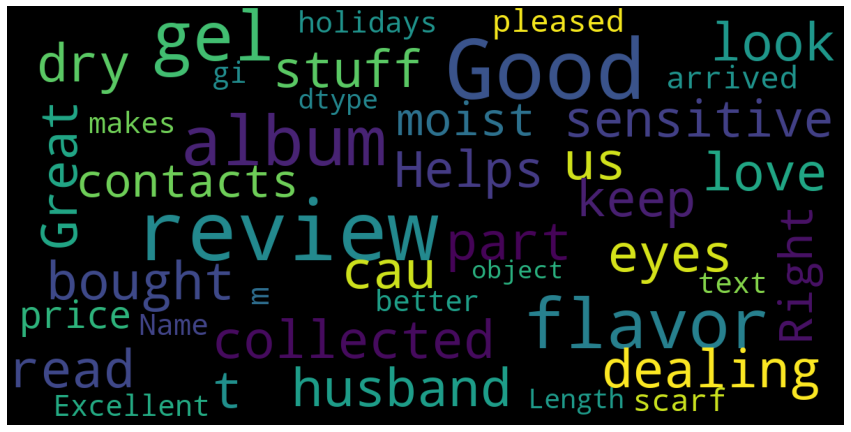

In [99]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(dataset['reviews.text'])

## TF-ID Vectorizer

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

In [101]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [102]:
token

RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [103]:
tf = TfidfVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,3),
                     tokenizer = token.tokenize)

In [104]:
tf

TfidfVectorizer(ngram_range=(1, 3), stop_words='english',
                tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)

In [105]:
X = tf.fit_transform(dataset2['Reviews'])

In [106]:
X

<64949x1296059 sparse matrix of type '<class 'numpy.float64'>'
	with 3119285 stored elements in Compressed Sparse Row format>

In [108]:
y = dataset2['Rating']

In [109]:
y

0        5
1        5
2        5
3        1
4        1
        ..
71039    5
71040    5
71041    5
71042    5
71043    5
Name: Rating, Length: 64949, dtype: int64

In [110]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [114]:
model = LogisticRegression(solver='saga',penalty = 'l1')

In [115]:
model.fit(x_train,y_train)

LogisticRegression(penalty='l1', solver='saga')

In [116]:
model.score(x_train,y_train)

0.7073846686810754

In [117]:
model.score(x_test,y_test)

0.6993841416474211

In [212]:
from sklearn.metrics import r2_score

In [118]:
wc = WordCloud(width=1000,height=900,min_font_size=10,background_color='black')

In [119]:
dataset2

Rating                                            Reviews  \
0           5  i love this album. it's very good. more to the...   
1           5  Good flavor. This review was collected as part...   
2           5                                       Good flavor.   
3           1  I read through the reviews on here before look...   
4           1  My husband bought this gel for us. The gel cau...   
...       ...                                                ...   
71039       5  I'm dealing with dry eyes and very sensitive t...   
71040       5  Great stuff! Helps keep my contacts moist all ...   
71041       5                                        Right price   
71042       5  I was so pleased when this scarf arrived for m...   
71043       5  Excellent album, makes the holidays better, gi...   

       reviews_length  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
...               ...  
71039               1  
71040               1  
71041               1  
71042               1  
71043               1  

[64949 rows x 3 columns]

In [120]:
dataset2[dataset2['Rating'] == 5]

Rating                                            Reviews  \
0           5  i love this album. it's very good. more to the...   
1           5  Good flavor. This review was collected as part...   
2           5                                       Good flavor.   
23          5  Loved This review was collected as part of a p...   
24          5  This is a good product. Will give you a great ...   
...       ...                                                ...   
71039       5  I'm dealing with dry eyes and very sensitive t...   
71040       5  Great stuff! Helps keep my contacts moist all ...   
71041       5                                        Right price   
71042       5  I was so pleased when this scarf arrived for m...   
71043       5  Excellent album, makes the holidays better, gi...   

       reviews_length  
0                   1  
1                   1  
2                   1  
23                  1  
24                  1  
...               ...  
71039               1  
71040               1  
71041               1  
71042               1  
71043               1  

[42640 rows x 3 columns]

In [121]:
dataset2[dataset2['Rating'] == 5]['Reviews'].str.cat(sep = " ")

'i love this album. it\'s very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy. Good flavor. This review was collected as part of a promotion. Good flavor. Loved This review was collected as part of a promotion. This is a good product. Will give you a great feeling. I really enjoyed using this product with my husband. After 20+ years of marriage, things can tend to get a little tired and boring. This was just the thing we needed to shake things up a bit. The packaging and pump dispenser is awesome. The product itself does not disappoint. A little goes a very long way. It provides a slight warming sensation when in use and does not become sticky or tacky in anyway. This is an excellent choice for an intimate lubricant. I received a free product for the purpose of my review. Opinions are 100 my own. Awesome Product for couples. It is a warm feeling lubricant and not

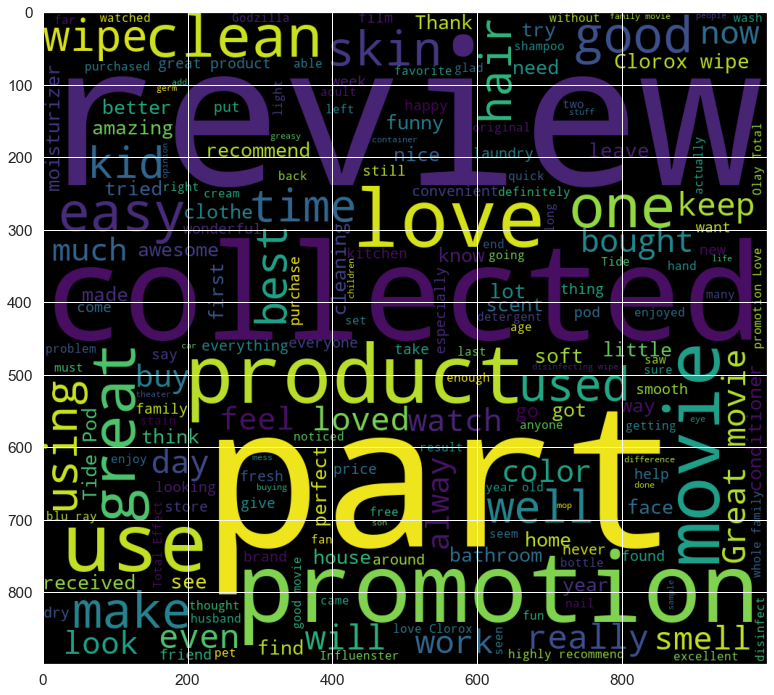

In [122]:
plt.figure(figsize=(16,12))
graph = wc.generate(dataset2[dataset2['Rating'] == 5]['Reviews'].str.cat(sep = " "))
plt.imshow(graph)
plt.show()

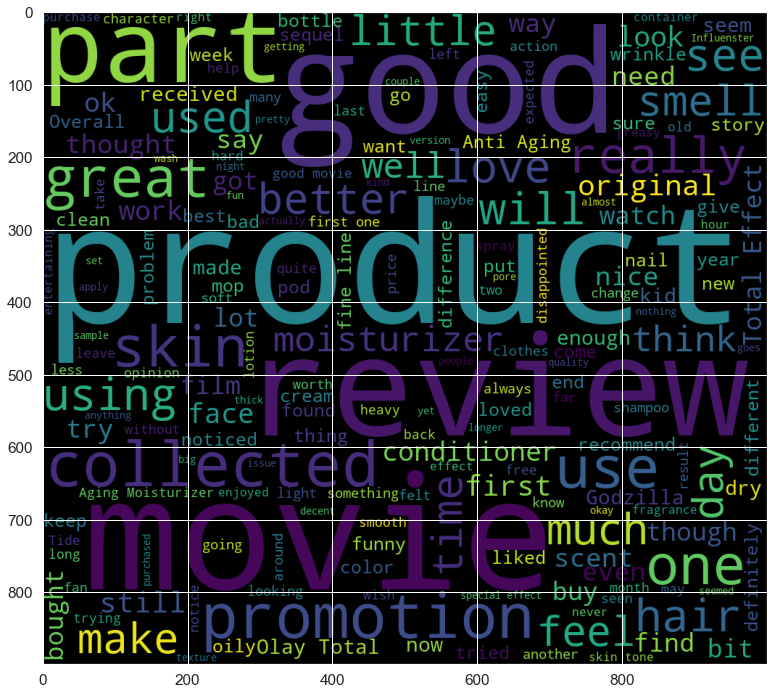

In [123]:
plt.figure(figsize=(16,12))
graph = wc.generate(dataset2[dataset2['Rating'] == 3]['Reviews'].str.cat(sep = " "))
plt.imshow(graph)
plt.show()

In [125]:
dataset2.head()

Rating                                            Reviews  reviews_length
0       5  i love this album. it's very good. more to the...               1
1       5  Good flavor. This review was collected as part...               1
2       5                                       Good flavor.               1
3       1  I read through the reviews on here before look...               1
4       1  My husband bought this gel for us. The gel cau...               1

In [131]:
dataset1['reviews.text'].value_counts()[0:3]

Good     26
Great    25
good     18
Name: reviews.text, dtype: int64

In [129]:
dataset1

brand                                         categories  \
0      Universal Music  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1             Lundberg  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2             Lundberg  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3                  K-Y  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4                  K-Y  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
...                ...                                                ...   
71039        Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
71040        Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
71041        Opti-Free  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
71042     Bebe Au Lait  Baby,Nursing & Feeding,Breastfeeding,Nursing C...   
71043             UMGD  Movies, Music & Books,Music,Gospel & Christian...   

                             manufacturer  reviews.rating  \
0      Universal Music Group / Cash Money               5   
1                                Lundberg               5   
2                                Lundberg               5   
3                                     K-Y               1   
4                                     K-Y               1   
...                                   ...             ...   
71039                           Opti-Free               5   
71040                           Opti-Free               5   
71041                           Opti-Free               5   
71042                        Bebe au Lait               5   
71043                             Def Jam               5   

                                            reviews.text  \
0      i love this album. it's very good. more to the...   
1      Good flavor. This review was collected as part...   
2                                           Good flavor.   
3      I read through the reviews on here before look...   
4      My husband bought this gel for us. The gel cau...   
...                                                  ...   
71039  I'm dealing with dry eyes and very sensitive t...   
71040  Great stuff! Helps keep my contacts moist all ...   
71041                                        Right price   
71042  I was so pleased when this scarf arrived for m...   
71043  Excellent album, makes the holidays better, gi...   

                   reviews.title  reviews_length  
0                   Just Awesome               1  
1                           Good               1  
2                           Good               1  
3                   Disappointed               1  
4                     Irritation               1  
...                          ...             ...  
71039         Solves the problem               1  
71040               Great stuff!               1  
71041                  My review               1  
71042          Wonderful Product               1  
71043  Makes The Holidays Better               1  

[71044 rows x 7 columns]